In [30]:
import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.dates as mdates

import jupyter_black

jupyter_black.load()

In [47]:
df = pd.read_csv(
    r"/Users/yotamhadari/Desktop/SOLIO/Group_1_SOLIO_1307.csv",
    index_col=[0, 1],
    parse_dates=True,
    dayfirst=True,
)
df.tail()

df["Week"] = np.nan
for n in range(0, len(df)):
    # start = n
    # end = n + 20
    # df.iloc[start:end, -1] = x
    date_bool = (
        df.index.get_level_values(1)[n] - df.index.get_level_values(1)[n - 1]
    ) == 3
    x = 1
    match date_bool:
        case True:
            x += 1
            df.iloc[n, -1] = x

        case False:
            df.iloc[n, -1] = x

In [48]:
df

,,Pain VAS,Qualitative pain,Day to day,Lifting weights,Walking,Sitting,Standing,Sleeping,Sex life,Social life,Travel,Week
User ID,Date,,,,,,,,,,,,
20,2022-07-10,1,3.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
7,2022-07-10,5,3.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
1,2022-07-10,0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
9,2022-07-10,3,3.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
16,2022-07-10,6,3.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
21,2022-07-10,3,3.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
5,2022-07-10,8,4.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
2,2022-07-10,6,3.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
18,2022-07-10,8,4.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


In [25]:
def create_indiviudal_user_dfs(df):
    """Create a dictionary where keys are user_n and values and individual answer df for that user."""
    users_dfs = {}
    for user in df.index.get_level_values(0).drop_duplicates():
        users_dfs[f"user_{user}"] = df.loc[df.index.get_level_values(0) == user]
    return users_dfs


users_dfs = create_indiviudal_user_dfs(df)
user_1 = users_dfs["user_1"]

In [26]:
user_1.groupby("Week").sum()

,Pain VAS,Qualitative pain,Day to day,Lifting weights,Walking,Sitting,Standing,Sleeping,Sex life,Social life,Travel
Week,,,,,,,,,,,


In [27]:
user_1_answers = {}
user_1.set_index(user_1.index.get_level_values(1), inplace=True)
for column in user_1.columns:
    user_1_answers[column] = user_1[column]

q_pain = user_1_answers["Qualitative pain"]

/var/folders/hj/qgbn39zd4fbfl7mt7wqk1w000000gn/T/ipykernel_3846/791817765.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df1.index, rotation=45)


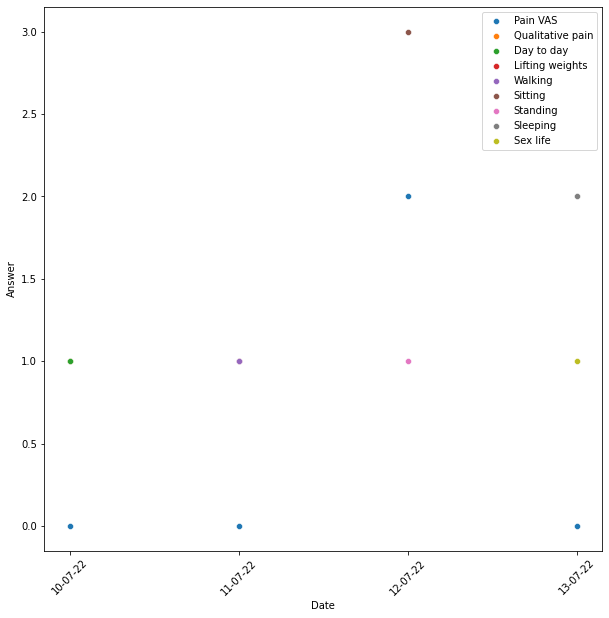

In [28]:
fig, ax = plt.subplots(sharex=True, figsize=(10, 10))
for key, df1 in user_1_answers.items():
    ax = sns.scatterplot(data=df1, legend="brief", label=key)
    ax.set(xlabel="Date", ylabel="Answer")
    ax.set_xticklabels(df1.index, rotation=45)
    myFmt = mdates.DateFormatter("%d-%m-%y")
    ax.xaxis.set_major_formatter(myFmt)
    plt.xticks(df1.index)

In [29]:
def user_string_input():

    user_number = st.text_input("User number", "user_1")
    st.write("The current user title is", user_number)
    return user_number


def bar_graph_data(df, user_n="user_1"):
    """A function that draws a bar plot where the x axis is the week number and the y axis is the question's answer.
    Streamlit functionality is to only choose the questions you want to see answers for right now."""

    users_dfs = create_indiviudal_user_dfs(df)
    user = users_dfs[user_n]
    user.set_index(user.index.get_level_values(1), inplace=True)

    grouped_week = user.groupby("Week").sum()
    grouped_week.drop("Pain VAS", axis=1, inplace=True)

    bar_graph_dict = {}
    plt.figure(figsize=(8, 8))
    N = len(grouped_week.index)
    ind = np.arange(N)
    width = 0.05

    questions_lst = []
    for question in df.columns[1:]:
        checkbox = st.checkbox(question)
        if checkbox:
            questions_lst.append(question)

    fig, ax = plt.subplots(sharex=True, figsize=(8, 8))
    for i, column in enumerate(questions_lst):

        vals = grouped_week[column]
        bar = ax.bar(ind + width * i, vals, width)
        bar_graph_dict[column] = bar

    plt.xlabel("Week")
    plt.ylabel("Answers")
    plt.title(f"Answers by week, {user_n}")

    plt.xticks(ind + width * 5, list(grouped_week.index))
    plt.legend((bar_graph_dict.values()), (questions_lst))
    st.pyplot(fig)


bar_graph_data(df, "user_3")

KeyError: 'user_3'

/var/folders/hj/qgbn39zd4fbfl7mt7wqk1w000000gn/T/ipykernel_3846/3516958686.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(user.index, rotation=45)


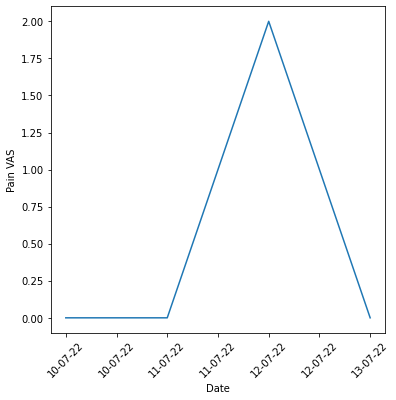

In [ ]:
def pain_vas_graph(df, user_n="user_1"):

    users_dfs = create_indiviudal_user_dfs(df)
    user = users_dfs[user_n]
    user.set_index(user.index.get_level_values(1), inplace=True)
    fig, ax = plt.subplots(figsize=(6, 6))
    ax = sns.lineplot(x=user.index, y=user["Pain VAS"])
    ax.set_xticklabels(user.index, rotation=45)
    myFmt = mdates.DateFormatter("%d-%m-%y")
    ax.xaxis.set_major_formatter(myFmt)
    st.pyplot(fig)


pain_vas_graph(df, "user_1")

In [ ]:
df.tail(10)

,,Pain VAS,Qualitative pain,Day to day,Lifting weights,Walking,Sitting,Standing,Sleeping,Sex life,Social life,Travel,Week
User ID,Date,,,,,,,,,,,,
16,2022-07-12,3,NaN,NaN,NaN,NaN,2.0,4.0,NaN,NaN,NaN,NaN,2.0
1,2022-07-13,0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1.0,NaN,NaN,2.0
21,2022-07-13,4,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,2.0
13,2022-07-13,5,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0,NaN,NaN,2.0
5,2022-07-13,5,NaN,NaN,NaN,NaN,NaN,NaN,2.0,5.0,NaN,NaN,2.0
20,2022-07-13,6,NaN,NaN,NaN,NaN,NaN,NaN,3.0,1.0,NaN,NaN,3.0
18,2022-07-13,8,NaN,NaN,NaN,NaN,NaN,NaN,2.0,4.0,NaN,NaN,3.0
7,2022-07-13,5,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1.0,NaN,NaN,3.0
17,2022-07-13,6,NaN,NaN,NaN,NaN,NaN,NaN,2.0,3.0,NaN,NaN,3.0


In [ ]:
df["Week"]

User ID  Date      
20       2022-07-10    1.0
7        2022-07-10    1.0
1        2022-07-10    1.0
9        2022-07-10    1.0
16       2022-07-10    1.0
21       2022-07-10    1.0
5        2022-07-10    1.0
2        2022-07-10    1.0
18       2022-07-10    1.0
14       2022-07-10    1.0
13       2022-07-10    1.0
17       2022-07-10    1.0
16       2022-07-11    1.0
5        2022-07-11    1.0
7        2022-07-11    1.0
1        2022-07-11    1.0
20       2022-07-11    1.0
14       2022-07-11    1.0
21       2022-07-11    1.0
18       2022-07-11    1.0
13       2022-07-11    2.0
17       2022-07-11    2.0
9        2022-07-11    2.0
2        2022-07-11    2.0
5        2022-07-12    2.0
7        2022-07-12    2.0
17       2022-07-12    2.0
14       2022-07-12    2.0
18       2022-07-12    2.0
20       2022-07-12    2.0
21       2022-07-12    2.0
13       2022-07-12    2.0
1        2022-07-12    2.0
9        2022-07-12    2.0
2        2022-07-12    2.0
16       2022-07-12    2.0
1       